In [1]:
# Данные тут
# https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k/data


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [2]:
temp=pd.read_csv('Fremont_Bridge.csv').head(3)
display(temp)
temp.info()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Date                            3 non-null object
Fremont Bridge East Sidewalk    3 non-null float64
Fremont Bridge West Sidewalk    3 non-null float64
dtypes: float64(2), object(1)
memory usage: 152.0+ bytes


In [3]:
df=pd.read_csv('Fremont_Bridge.csv',index_col='Date',parse_dates=True)
df.columns=['East','West']
display(df.head(5))

,East,West
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54744 entries, 2012-10-03 00:00:00 to 2018-12-31 23:00:00
Data columns (total 2 columns):
East    54735 non-null float64
West    54735 non-null float64
dtypes: float64(2)
memory usage: 1.3 MB


In [5]:
df['Total']=df['East'] + df['West']
display(df.head(5))

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


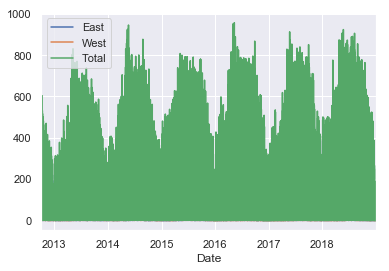

In [6]:
sns.set()
df.plot()

(376944, 380568)

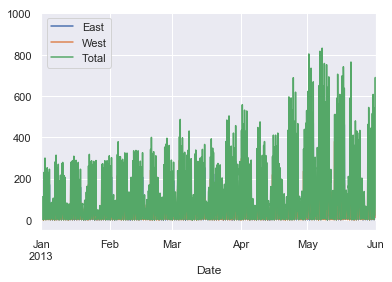

In [7]:
_=df.plot()
_.set_xlim(datetime.datetime(2013,1,1),datetime.datetime(2013,6,1))

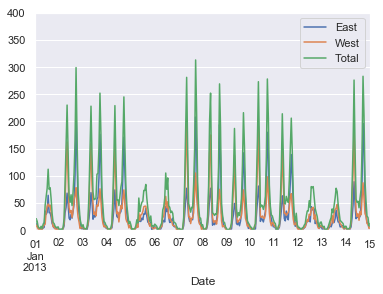

In [8]:
_=df.plot()
_.set_xlim(datetime.datetime(2013,1,1),datetime.datetime(2013,1,15))
_.set_ylim(0,400);

In [9]:
weekly=df.resample('W').sum()
weekly.head(3)

,East,West,Total
Date,,,
2012-10-07,6995.0,7297.0,14292.0
2012-10-14,8116.0,8679.0,16795.0
2012-10-21,7563.0,7946.0,15509.0


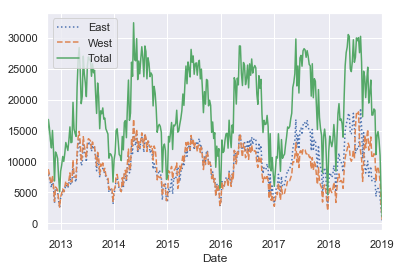

In [10]:
weekly.plot(style=[':','--','-']);

,East,West,Total
Date,,,
2012-10-03,1761.0,1760.0,3521.0
2012-10-04,1767.0,1708.0,3475.0
2012-10-05,1590.0,1558.0,3148.0


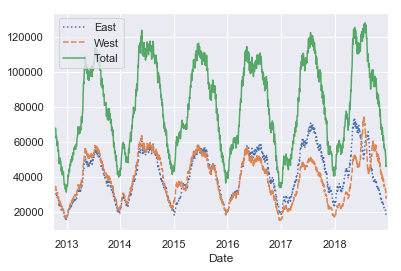

In [11]:
daily=df.resample('D').sum()
display(daily.head(3))
daily_mean=daily.rolling(30,center=True).sum()
daily_mean.plot(style=[':','--','-']);

In [12]:
# сглаживание с переносом результата в середину выборки
display(daily_mean.head(30))
display(daily_mean.tail(30))

,East,West,Total
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN
2012-10-06,NaN,NaN,NaN
2012-10-07,NaN,NaN,NaN
2012-10-08,NaN,NaN,NaN
2012-10-09,NaN,NaN,NaN
2012-10-10,NaN,NaN,NaN
2012-10-11,NaN,NaN,NaN


,East,West,Total
Date,,,
2018-12-02,22240.0,34455.0,56695.0
2018-12-03,22277.0,35120.0,57397.0
2018-12-04,22276.0,35686.0,57962.0
2018-12-05,21952.0,35016.0,56968.0
2018-12-06,21406.0,34007.0,55413.0
2018-12-07,21496.0,33950.0,55446.0
2018-12-08,21634.0,34078.0,55712.0
2018-12-09,21527.0,33924.0,55451.0
2018-12-10,21438.0,33775.0,55213.0


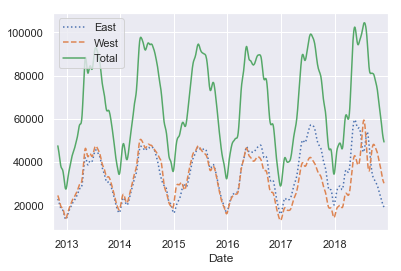

In [23]:
daily_gauss=daily.rolling(60,center=True,win_type='gaussian').sum(std=10)
daily_gauss.plot(style=[':','--','-']);

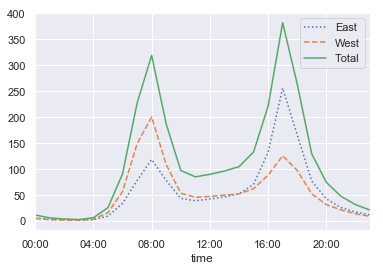

In [14]:
day_time=df.groupby(df.index.time).mean()
hourly_ticks=day_time.index.values[::4]
g=day_time.plot(style=[':','--','-']);
g.set_xticks(hourly_ticks);

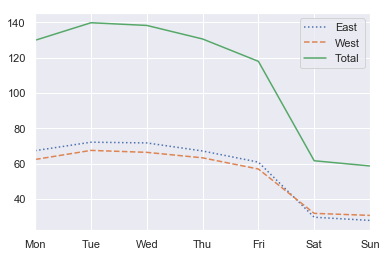

In [15]:
week_day=df.groupby(df.index.dayofweek).mean()
#  внимание смотреть тут  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
week_name=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
week_day.index=week_name

g=week_day.plot(style=[':','--','-'])
g.set_xticks(np.arange(len(week_name)));# тут нужно объяснить, что нумерация идет с 1, поэтому танец с бубном!
g.set_xticklabels(week_name);

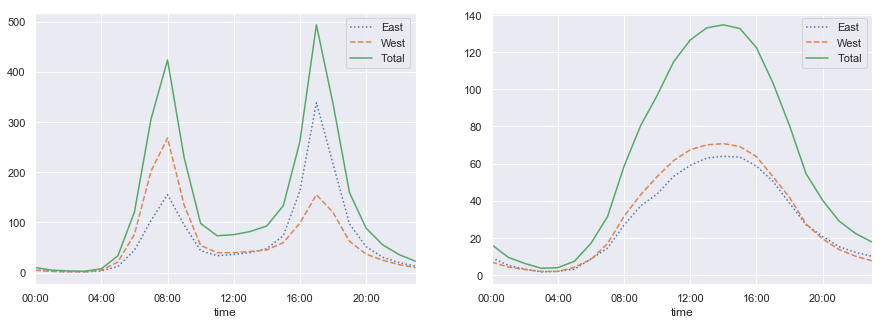

In [16]:
day_type=np.where(df.index.dayofweek<5,'Workday','Weekend')
by_day=df.groupby([day_type,df.index.time]).mean()

fig , ax = plt.subplots(1,2,figsize=(15,5))

by_day.loc['Workday'].plot(ax=ax[0],xticks=hourly_ticks,style=[':','--','-']);
by_day.loc['Weekend'].plot(ax=ax[1],xticks=hourly_ticks,style=[':','--','-']);

In [17]:
day_month=df.index.month
by_month_day=df.groupby([day_month,day_type,df.index.time]).mean()
display(by_month_day.head())
by_month_day.index.names

East      West     Total
Date                                               
1    Weekend 00:00:00  5.673077  4.288462  9.961538
             01:00:00  3.134615  2.980769  6.115385
             02:00:00  1.788462  1.903846  3.692308
             03:00:00  0.903846  1.000000  1.903846
             04:00:00  1.173077  1.115385  2.288462

FrozenList(['Date', None, None])

In [18]:
by_month_day.index.names=['month','day','time']
by_month_day.head()

East      West     Total
month day     time                                  
1     Weekend 00:00:00  5.673077  4.288462  9.961538
              01:00:00  3.134615  2.980769  6.115385
              02:00:00  1.788462  1.903846  3.692308
              03:00:00  0.903846  1.000000  1.903846
              04:00:00  1.173077  1.115385  2.288462

In [19]:
df_1=by_month_day.reset_index()
df_1.head()

,month,day,time,East,West,Total
0,1,Weekend,00:00:00,5.673077,4.288462,9.961538
1,1,Weekend,01:00:00,3.134615,2.980769,6.115385
2,1,Weekend,02:00:00,1.788462,1.903846,3.692308
3,1,Weekend,03:00:00,0.903846,1.000000,1.903846
4,1,Weekend,04:00:00,1.173077,1.115385,2.288462


C:\Users\Yana\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


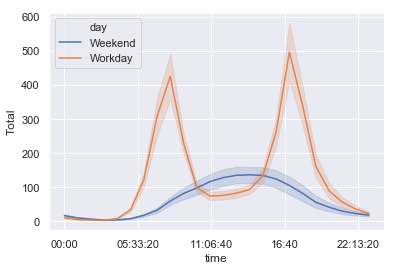

In [20]:
sns.lineplot(data=df_1, x='time', y='Total', hue='day');

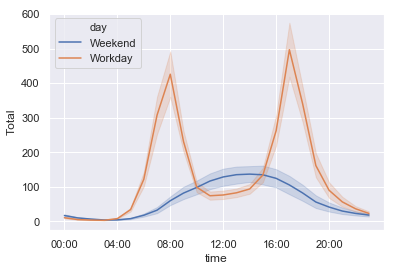

In [21]:
fig, ax =plt.subplots()
sns.lineplot(data=df_1, x='time', y='Total', hue='day')
plt.xticks(hourly_ticks);

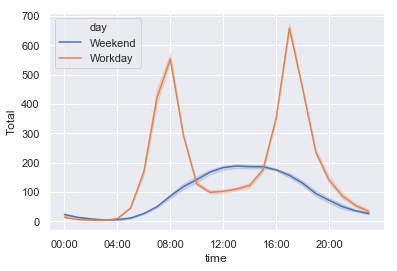

In [26]:
df_2=df_1[df_1.month.isin([5,6,7,8])]
fig, ax =plt.subplots()
sns.lineplot(data=df_2, x='time', y='Total', hue='day')
plt.xticks(hourly_ticks);
